***
# &nbsp;
<font size="7" color="#00A0B2"  face="verdana"> <B><center>BIG MART SALES</center></B></font>
***

Occasionally, we all love to go on a shopping spree, only to realize later that most of the things we purchase may not be precisely valuable. One of the primary reasons behind this could be store executives’ clever placement of different products. You might be wondering if that is the case, how can one then protect themselves from falling for such smartly curated traps? Find out the answer to it as we discuss briefly one of the most straightforward machine learning project ideas for beginners: BigMart Sales Prediction.

**Understanding of the Problem Statement**


The data scientists at Big Mart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

- According to the quote, "Success in sales is the sum of small efforts, repeated day in & day out"

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

**APPLICATION OF PREDICTING THE SALES:**

- We can tell the company what are all the challenges they may face

- What are the brands or products which is sold the most and  other such kind of things

- This helps sales team to understand which product to sell & which product to promote & other such kind of things

- They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)

### Hypothesis generation with respect to problem statement.
- Item weight might effect a sales of the product.
- Sales of the product may be depends on the items fat content.
- More Item_Visibility of a particular product may be costlier than other products.
- Item type could have an effect on the sales.
- Are the items with more MRP have more item outlet sales.
- Are the stores which have established earlier have more sales.
- Size of the stores could have an effect on the item sales at a particular store.
- Location of the stores might depends on the Item outlet sales.
- Are the supermarkets have more sales than others.

The figure below give a detail over view of the undelying features how they are related to the predictor variable sales.

##### Dataset Description
| Variable     | Description |
| -----------  | ---: |
|Item_Identifier | Unique product ID|
|Item_Weight | Weight of product|
|Item_Fat_Content | Whether the product is low fat or not|
|Item_Visibility | The % of total display area of all products in a store allocated to the particular product|
|Item_Type | The category to which the product belongs|
|Item_MRP | Maximum Retail Price (list price) of the product|
|Outlet_Identifier | Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|

In [ ]:
### import the neccesary librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #statistical functions and tools
from pylab import rcParams
import warnings # control the display of warning messages
warnings.filterwarnings("ignore")

%matplotlib inline
rcParams['figure.figsize'] = 12,6
sns.set_style('whitegrid')

train file: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data?select=Train.csv

test file:  https://www.kaggle.com/code/dhakebabamett17/starter-bigmart-sales-data-d045d84f-4/input?select=Test.csv

In [ ]:
# load dataset

df = pd.read_csv("/content/BigmartTrain.csv",
                 index_col=None, encoding='utf-8')
test = pd.read_csv("/content/BigmartTest.csv")

# since Item_Identifier is unique, we index this column

#### 1.0 Preliminaries

In [ ]:
# view the first few rows

print('# of records/rows in dataframe: ' + str(len(df.index)) + '\n')
print('# of features/columns in dataframe: ' + str(len(df.keys())) + '\n')
df.head()

# of records/rows in dataframe: 8523

# of features/columns in dataframe: 12



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# check the column headers

df_columns = list(df.columns)
print(df_columns)

#df.columns

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [ ]:
#What are the data types for various features?

df.dtypes

#•	Seven features are strings or objects.
#•	Five features are integer or floats numbers.

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# basic info on dataset
df.info()
print('_'*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
_____________________________________________

from indication, there are missing values in the following columns: 'Item_Weight', 'Outlet_Size'

In [ ]:
# which features are numeric data

num_df = df.select_dtypes(include=["number"]).copy()
num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


Numerical Features:
- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year
- Item_Outlet_Sales(Target Variable)


In [ ]:
# Which features are categorical?

cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


Categorical Features
- Item_Identifier
- Item_Fat_Content(Ordinal Feature)
- Item_Type
- Outlet_Itemtifier
- Outlet_Size(Ordinal Feature)
- Outlet__Location_Type(Ordinal Feature)
- Outlet_Type(Ordinal Feature)


Some of the numerical features contain missing data which will be handle later on. Meanwhile, the categorical features will be transformed using the appropriate encoding or mapping methods.

### Basic Descriptive statistics on numeric features
Pandas has ```describe()``` function that provide functionality for doing Basic descriptive Statistics on a dataset imported as dataframe.

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The following informations can be obtained from the table above:
- The mean and median of all the columns/features are alike or closed together apart from Item_Outlet_Sales
- Due to the disparity of mean and median of Item_Outlet_Sales feature, it shows that there is(are) outliers in this column. This can can also be seen from the fact that ```3 * std > mean ```. We can as well see this from the min (33) and max (13086) in this column
- The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
- The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
- Most recent store was established in 2009 and the oldest store was established in 1985.
- Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values
- Average sales of items is 2181 and the maximum sale is 13,086.

###  1.1 Explroatory data analysis
Understanding the dataset and the distribution of variables is critical in implementing any ML project ideas. Thus, the first data science concept to explore in this big mart sales prediction project is plotting graphs to understand the data. You will learn how to generate visualizations that help analyze outliers threshold and reveal variables containing missing values. Furthermore, the graphs will also assist in determining insights about different stores, for example, how the size of an outlet is related to the profit it generates. Visualizing data also helps decide thresholds for converting categorical variables into numerical values and deducing irrelevant feature variables.

We gonna dive deep into looking at some hidden patterns in the features of the dataset in order to get a detail view of their relationships. We will apply concepts like groupby, pivot tables, correlation, visualizations using matplotlib and seaborn

### 1.1.1 Univariate : numerical features

We are now  ready  to start  playing with   the data.  A good way  to get  an   initial   feeling of the
data  is  to create graphical  representations with   the aim of  getting an  understanding of the shape of its distribution.

To start with the simplest case, we look at the variables in the data individually without first worrying about the relationships between variables

A  histogram  is a standard way of  displaying  the distribution  of  quantitative data, that is, data that  can  be  represented in  terms of real numbers or  integers. A  histogram separates  the data  in  a number of  bins,  which  are simply  intervals of values,  and counts how many of the data points  lie in each of  the bins.

Lets display the distribution of Sales of the product ```numerical features```

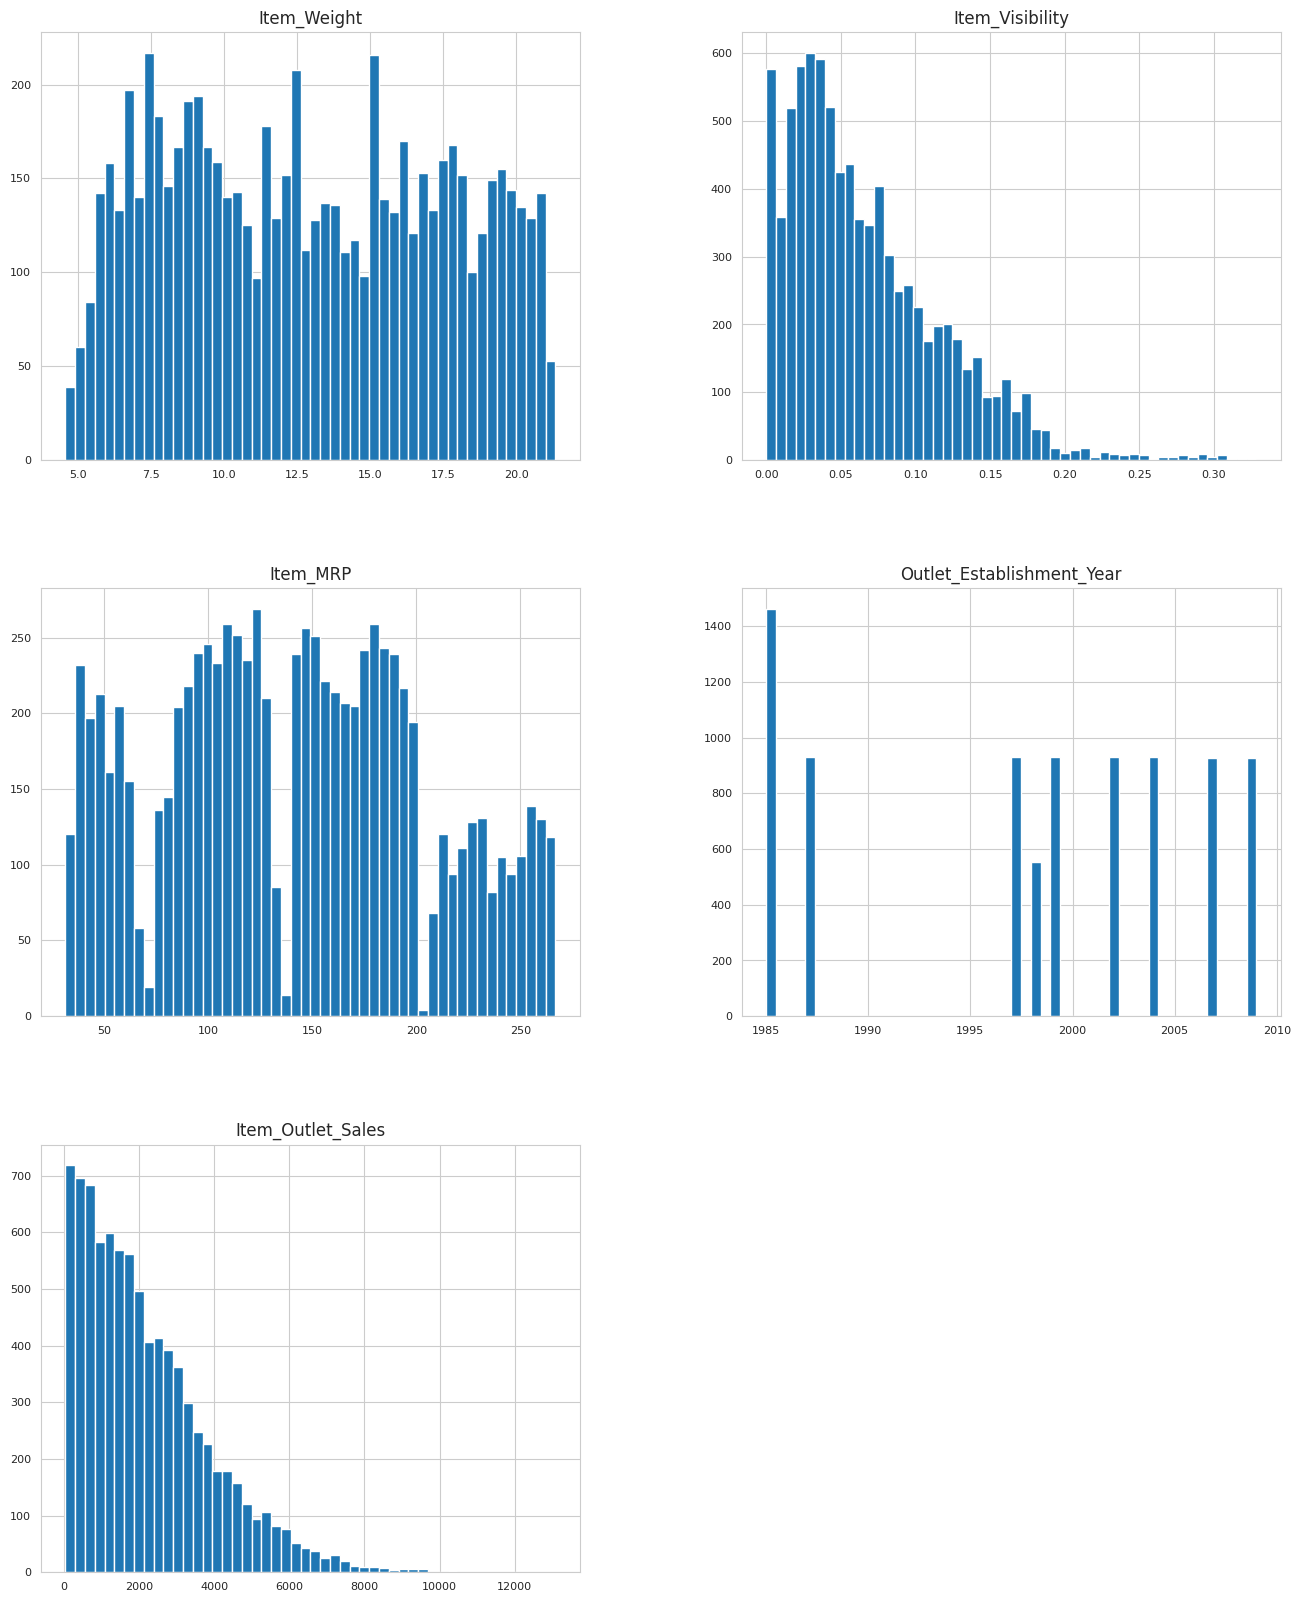

In [ ]:
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# checking skewedness

print("Skewedness of numerical features")
print("*"*40)
print (num_df.skew())

Skewedness of numerical features
****************************************
Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


- we can see that the distribution of Item_Outlet_Sales is right_skewed and contain outliers.
- applying the function created above to all numerical features, we will realise that:
  - Item_Weight is bimodal ranges between 4 and 20 with no outliers
  - Item_Visibility is right skewed
  - Item_MRP is bimodal ranging from 50 to 250\
  - Most of the stores are established in year from 1985-1990 and 1995 to 2000.
  - From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
  - Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

### 1.1.2 Univariate: Categorical Features

In this section, we are going to explore and analyze categorical features to look hidden insides that relate to our hypothesis formulated earlier on.

In [ ]:
def UVA_Categorical(data, cat):
    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Create a count plot using seaborn for the categorical variable (cat)
    sns.countplot(data=data, x=cat)

    # Set the x-axis label
    plt.xlabel(cat, fontsize=14, fontweight='bold')

    # Set the y-axis label
    plt.ylabel('Count', fontsize=14, fontweight='bold')

    # Set the title of the graph with value counts and percentages
    plt.title('Value counts: \n{}'.format(data[cat].value_counts(normalize=True)*100))

    # Rotating xticklabels if there are more than 7 categories
    if len(data[cat].value_counts()) > 7:
        X = plt.gca().xaxis
        for item in X.get_ticklabels():
            item.set_rotation(90)

    # Show the plot
    plt.show()

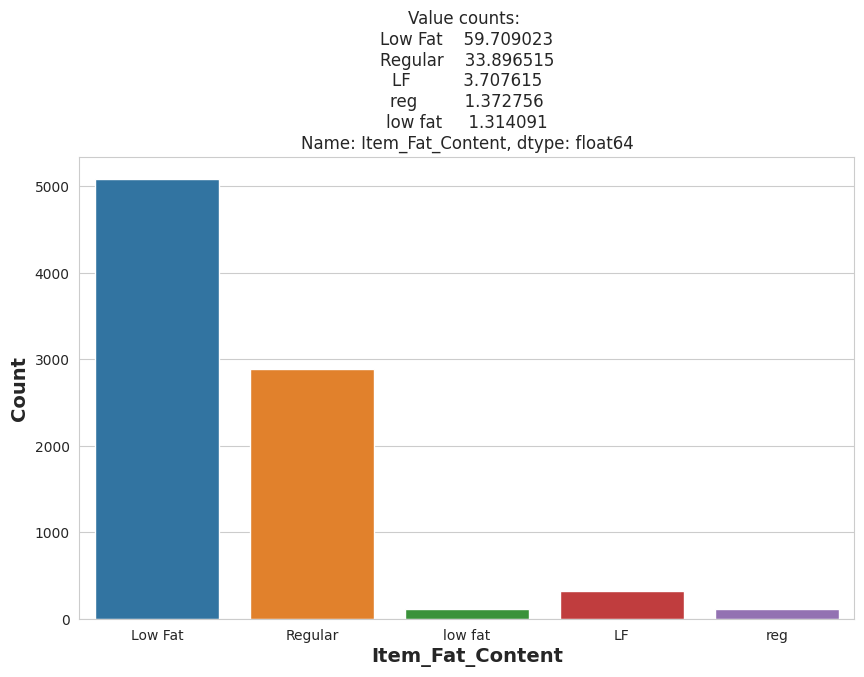

In [ ]:
# 1 Distribution of fat content of items

UVA_Categorical(data=df,cat='Item_Fat_Content')

Observation:
- about 60% of the total items contain Low Fat, 34% are regular. Therefore most of the items in the store had low fat content.
- It's like there was an error typing the name low fat, LF and reg for Low Fat and Regular respectively. So, we can easily correct this to the right format.

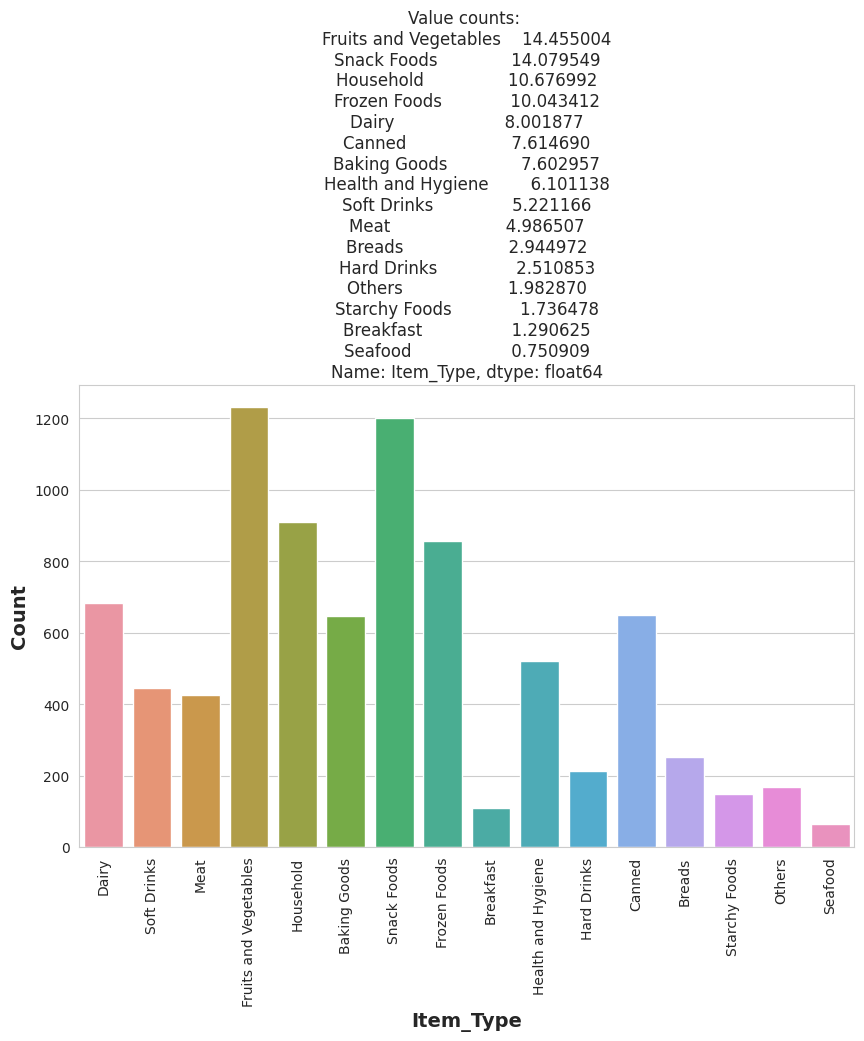

In [ ]:
# 2 distribution of the type of items sold in the stores

UVA_Categorical(df,'Item_Type')

Oservations:
- The  above  graph  indicates  the  different  types  of  items  that  are  in  the  outlet.  This  shows  the  wide  range  of products that are available in the outlet.
- for Item_Type we have 16 different types of unique values
- More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
- Sale of breakfast and seafood type of items are very less.

In [ ]:
# 3 Unique store ID (number of stores)

cat_df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

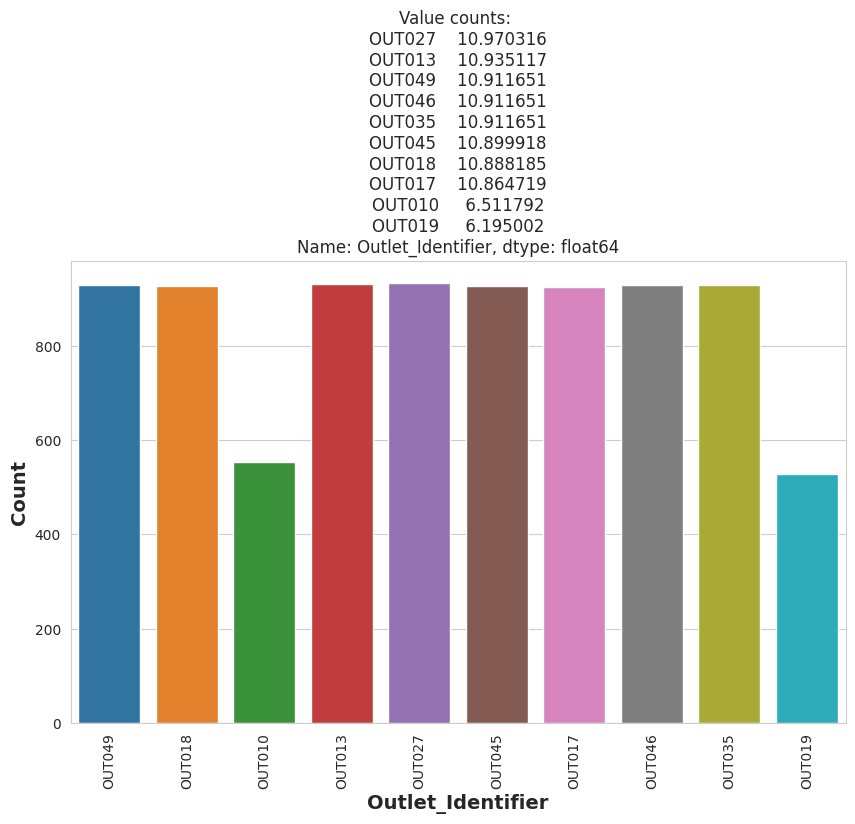

In [ ]:
UVA_Categorical(df,'Outlet_Identifier')

- Stores with ID ranging from OUT018 - OUT049 occured most frequent (> 900 times) compare to the rest.
- There are total 10 stores.
- All the stores are selling almost same number of items except the OUT010 and OUT019 stores

In [ ]:
# 4 What is the distribution of the size of store in terms of ground area covered?

cat_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

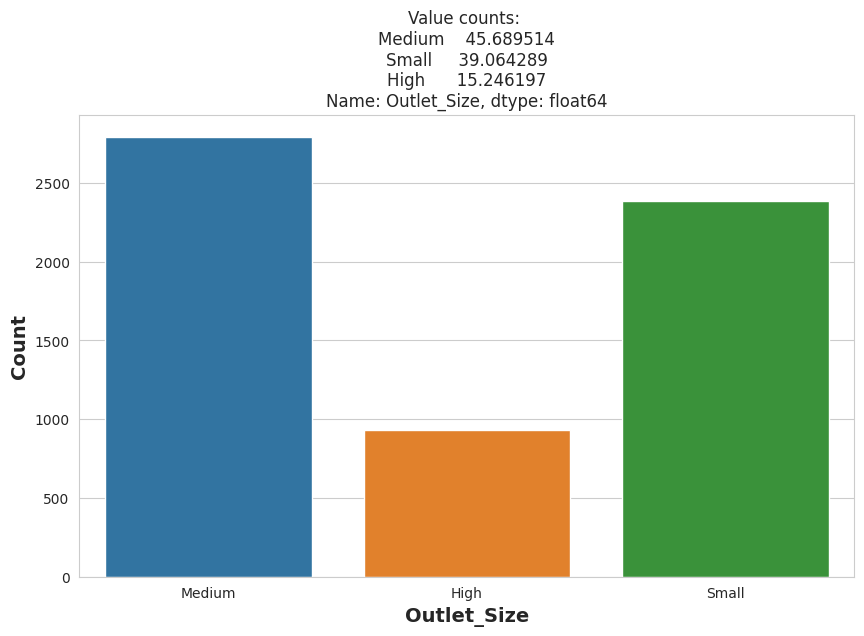

In [ ]:
UVA_Categorical(df,'Outlet_Size')

Observations
- 45% of the total number of items are sold from medium size store
- 39% of the total number of items are sold from small size store
- only 15% items are sold from store which are very big.
- This  clearly  indicates  that  most  of  the  outlet  size  are  either small or medium. Only a few of the outlets are large in size.

From the display above, it seems as if most of the items or product are sold from medium size and small size stores. we dive deep into this later on.

In [ ]:
# 5 The type of city in which the store is located

df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

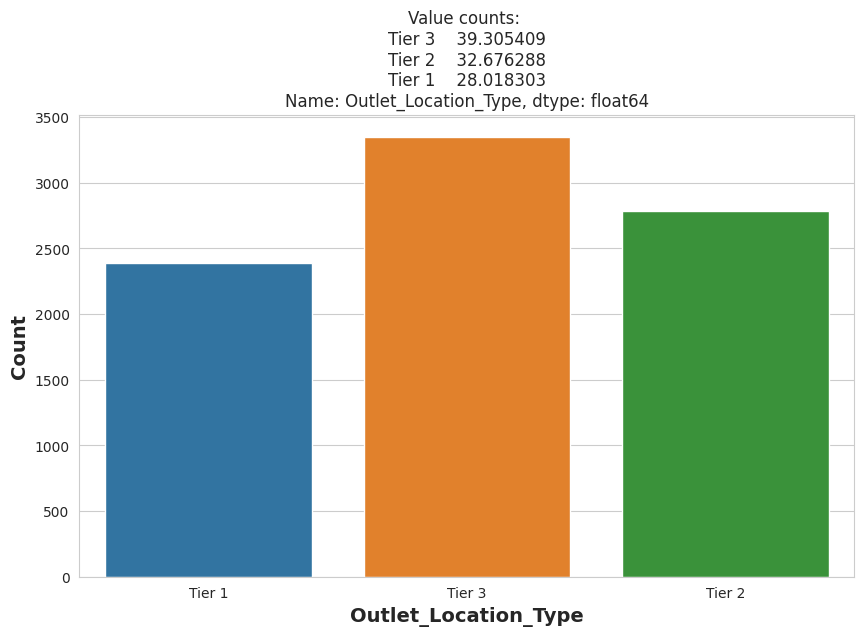

In [ ]:
UVA_Categorical(df,'Outlet_Location_Type')

Observations:
- 39% of the items sells from the stores located in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.

Most of the items are present in Tier 3 cities.

In [ ]:
# 6 check Whether the outlet is just a grocery store or some sort of supermarket

df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

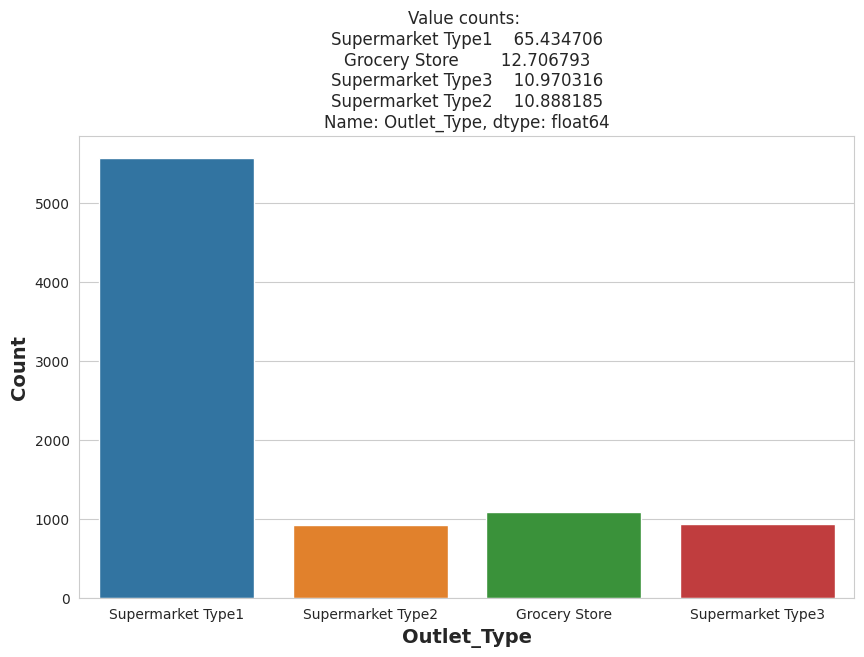

In [ ]:
UVA_Categorical(df,'Outlet_Type')

Observations
- 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores
- There seems like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low numbers of stores, we can create a single category with all of three, but before doing this we must see their impact on target variable.

#### 1.1.3  Bivariate Analysis
Now it time to see the relationship between our target variable and predictors.

In [ ]:
### 1 Numerical Variables

In [ ]:
##  Correlation matrix using Pearson and Spearman correlation of numerical features and target variable

num_df.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
# spearman's correlation rank

num_df.corr(method='spearman')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014879,0.030822,-0.009393,0.015062
Item_Visibility,-0.014879,1.000000,0.005688,-0.054924,-0.115076
Item_MRP,0.030822,0.005688,1.000000,0.003782,0.562986
Outlet_Establishment_Year,-0.009393,-0.054924,0.003782,1.000000,0.042947
Item_Outlet_Sales,0.015062,-0.115076,0.562986,0.042947,1.000000


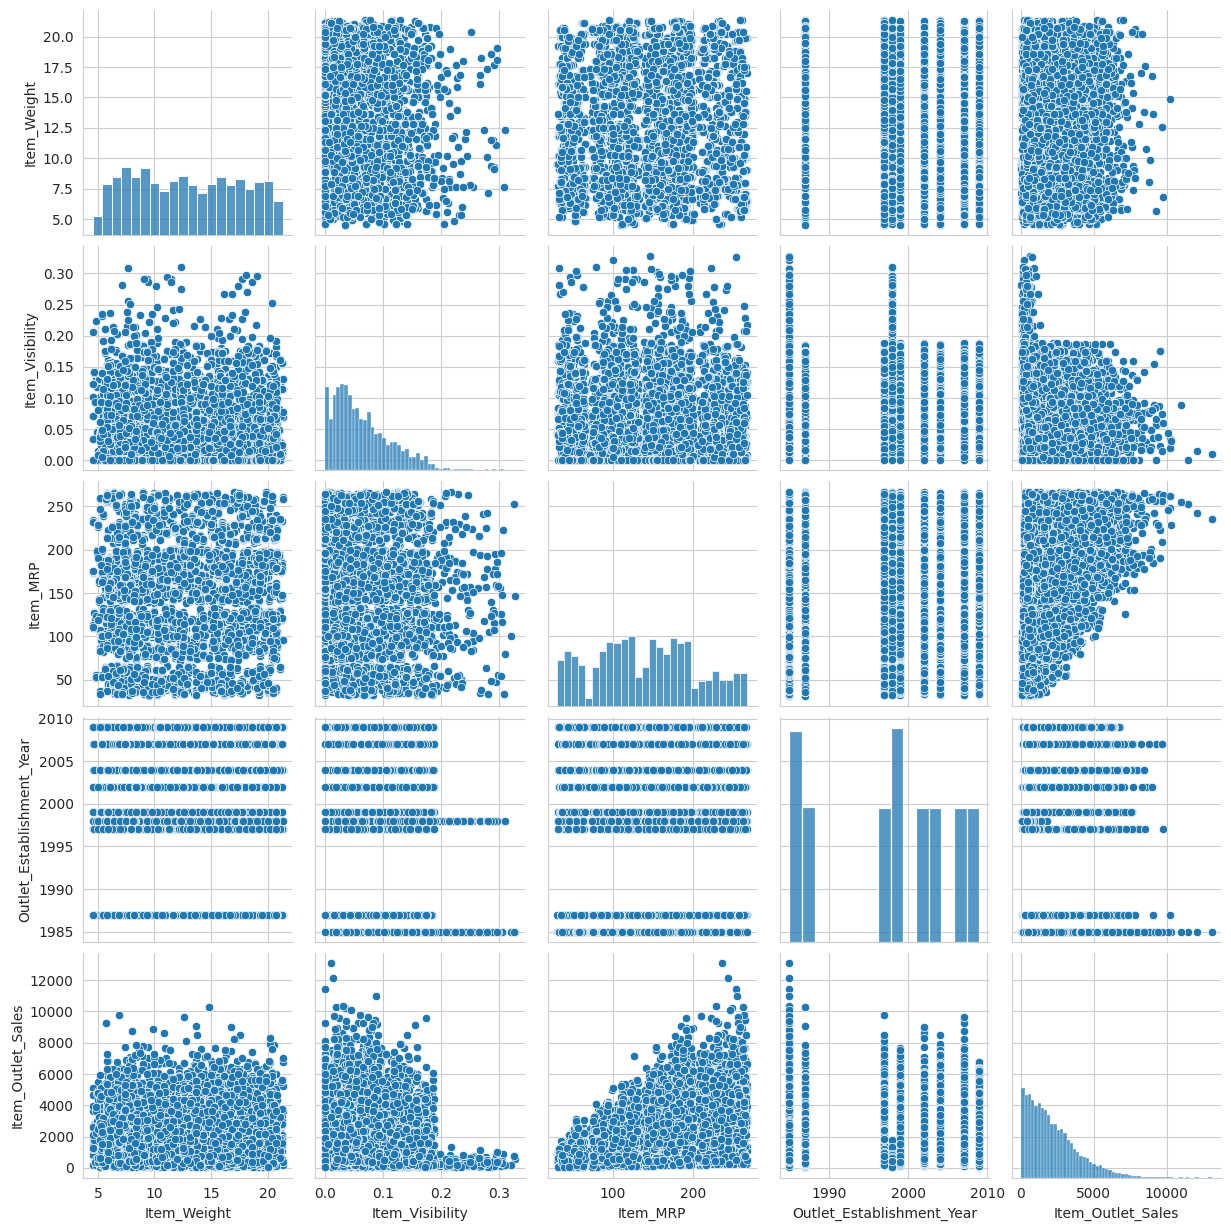

In [ ]:
sns.pairplot(num_df)

Text(0.5, 1.0, 'Correlation between different attributes')

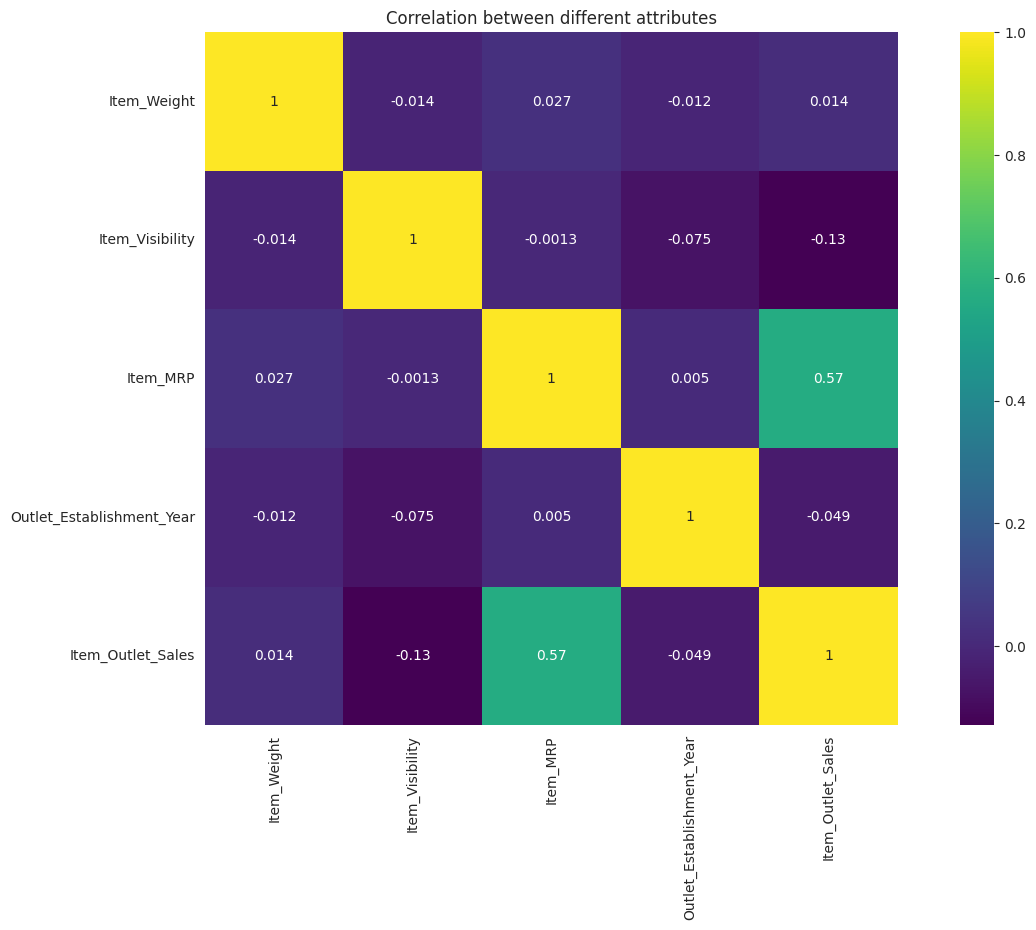

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")

Observation:
- Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
- Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
- Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales.

In [ ]:
### 2. Categorical and target variable

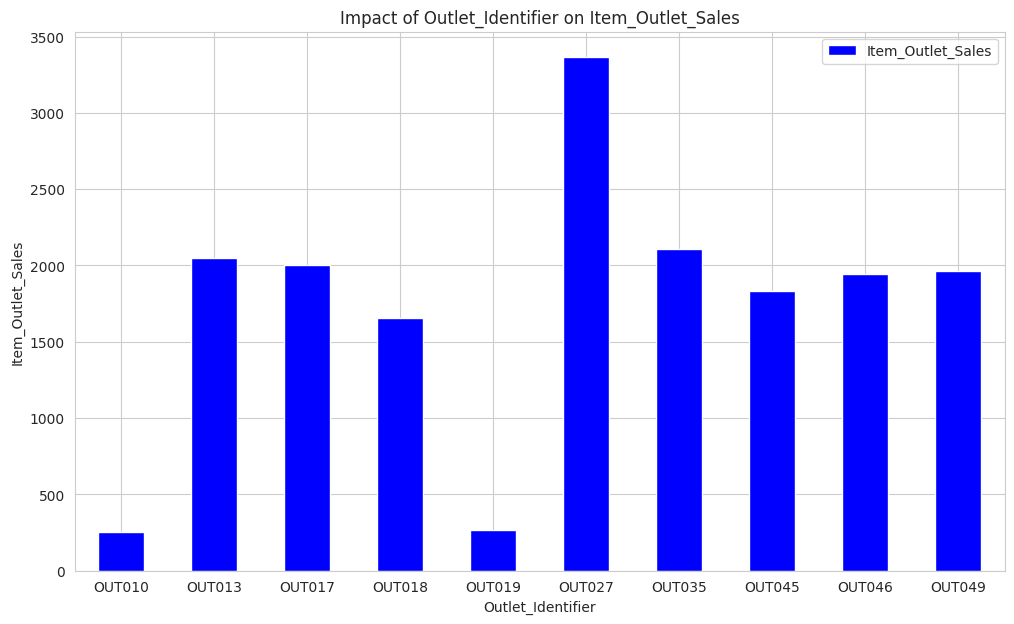

In [ ]:
# Impact of Outlet_Identifier on Item_Outlet_Sales

Outlet_Identifier_pivot = df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

observation:
- outlet_identifier OUT027 has majority of the sales of morethan 3000
- OUT010 and OUT019 had the least sales

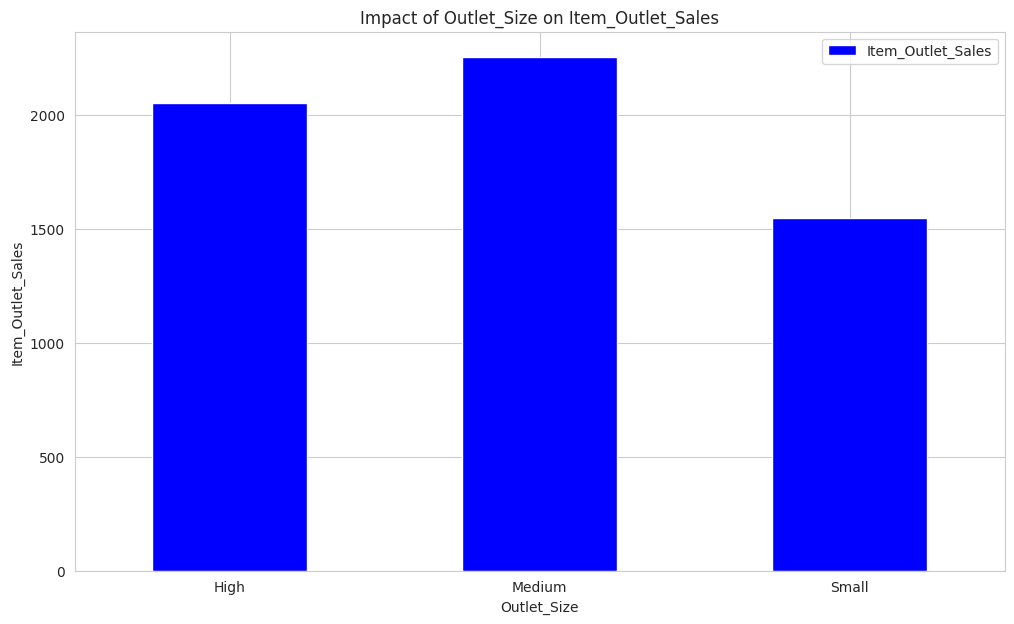

In [ ]:
# Impact of Outlet_Size on Item_Outlet_Sales

Outlet_Size_pivot = df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Observation:
- medium size stores made the highest sales of over 2000, followed by High stores and small size stores make the lowest sales

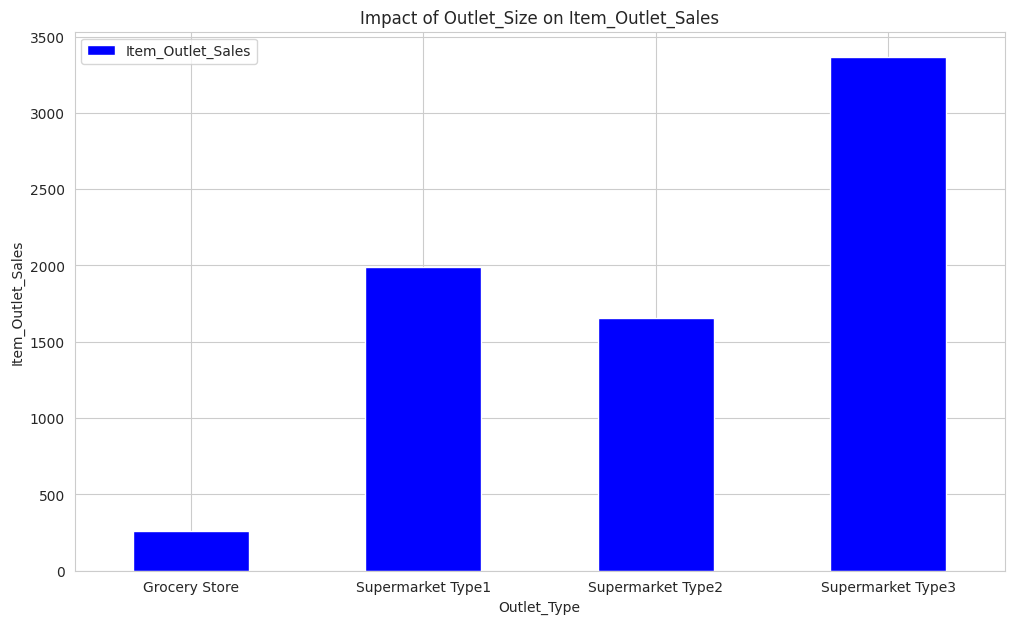

In [ ]:
# Impact of Outlet_Type on Item_Outlet_Sales

Outlet_Type_pivot = df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

observations:
- Most sales are coming from Supermarket  Type3 with over 3000
- Glocery had the smallest amount of sales with less than 500

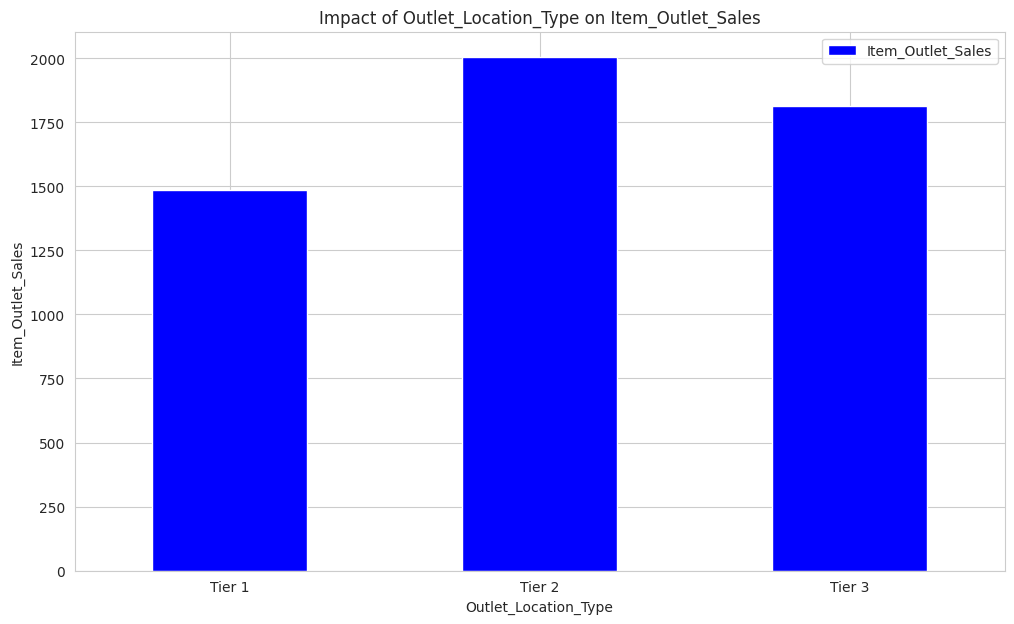

In [ ]:
# Impact of Outlet_Location_Type on Item_Outlet_Sales

Outlet_Location_Type_pivot = df.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

obsevations:
- Tier2 had the highest amount of sales 2000, followed by Tier3 and Tier1
- This contradict the result from univariate analysis of Outlet_Location_Type

### 1.2 Data Preprocessing

***Task***: The Bigmart sales dataset contains different types of variables, and this project will assist you in processing different data types. Additionally, the data has missing values as some stores do not report all the data due to technical glitches. Hence, you get to learn how to treat them accordingly. Also, you will learn about two essential methods: label encoding and one-hot encoding for treating categorical variables. The dataset also contains many outliers, and it is not a good practice to train your model with those distant values. This big mart sales prediction machine learning project will thus help you in learning how to eliminate specific outliers from the dataset. Furthermore, you will learn how to perform and create the test-train dataset to apply machine learning algorithms.

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again.
This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [ ]:
# merge train and test to ease the cleaning process

df['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0      # impute o in sales column in test dataset to avoid nan values
data = pd.concat([df, test], sort = False)
print(df.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [ ]:
# Create table for missing data analysis

def draw_missing_data_table(df):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing[missing['Total']>0]   # missing values greater than 0
    return missing_data

In [ ]:
draw_missing_data_table(data)

,Total,Percent
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219


In [ ]:
#Assess Missing Data in each column or features

def bar_plot_missing_val(df,title=None,x_label=None, y_label=None,kind = 'bar'):
    '''Plot a bar chart of missing values in a dataframe'''
    a = df.isnull().sum()/len(df)*100
    a.plot(title=title,x =x_label, y=y_label,kind=kind)

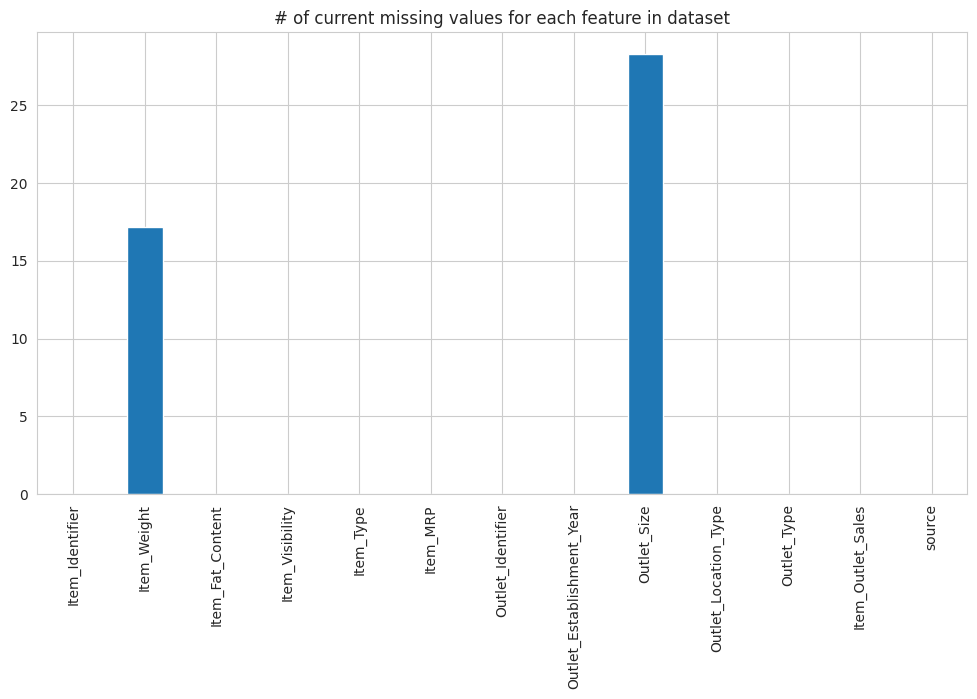

In [ ]:
# Check how much missing data are currently in each column of the dataset
bar_plot_missing_val(data,'# of current missing values for each feature in dataset', 'Features','# Missing values')

obseavtions:
- about 28% and 17% of the data is missing in outlet_size and item weight respectively. we will apply the appropriate imputation to handle these missing values.

In [ ]:
# Filling the mssing data in Item_weight with mean. Because every item should have some weight

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [ ]:
# handling missing values in outlet_size
from scipy.stats import mode

In [ ]:
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

Mode for each Outlet_Type:
Outlet_Type Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size             Small            Medium            Medium


In [ ]:
#Impute data and check #missing values before and after imputation to confirm

#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull()

print ('\nOrignal #missing: %d'% sum(missing_values))
print (sum(data['Outlet_Size'].isnull()))


Orignal #missing: 4016
4016


In [ ]:
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [ ]:
# check missing values of dataframe

draw_missing_data_table(data)

,Total,Percent


In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

During visualizing the data in the data visualization phase, it is found that the attributes Item Weight and Outlet
Size have missing values. Pre-processing of data is required in order to fill the data with  missing values so that
it can adopt to a machine learning model which helps in increasing the efficiency of the model. The values that
are missing which corresponds to the Item Weight was filled by averaging the weight of the particular item on
the other hand the missing values that corresponds to the outset size was filled by using the mode of the outlet
size

In [ ]:
# correcting item fat content

# Replacement of LF and low fat
data.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], value = ["Low Fat", "Low Fat"], inplace=True)

# Replacing reg into Regular
data.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

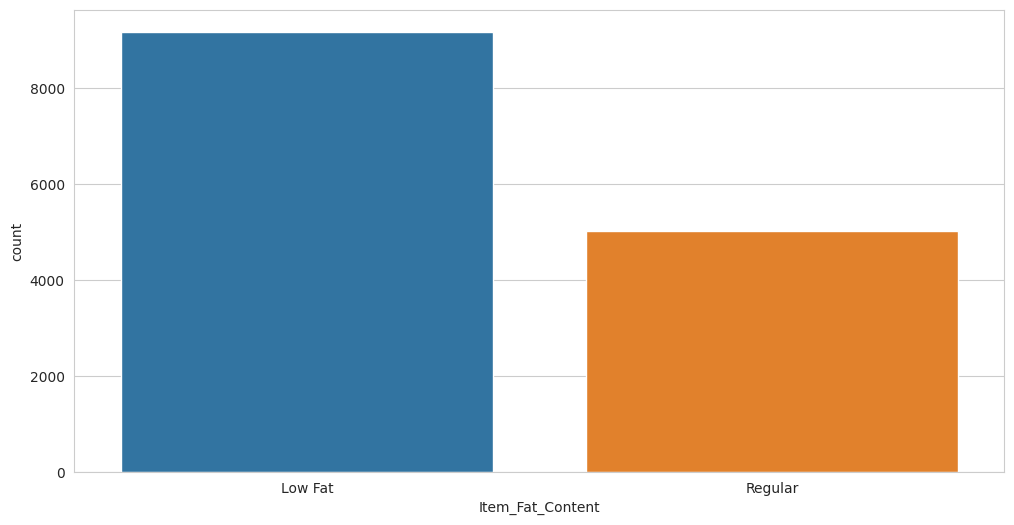

In [ ]:
# checking the result

sns.countplot(x="Item_Fat_Content", data=data)

In [ ]:
data.to_csv("data_cleaned.csv", index = None)

##### Create a broad category of Type of Item

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [ ]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### 1.3 Numerical and One-Hot Coding of Categorical variables

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,1


In [ ]:
#One Hot Coding:

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [ ]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
#Divide into test and train:
train = data.loc[data['source']=="train"]  # select data where source is equal to train (ie select all data in dataset
                                           # where source feature is equal train
test = data.loc[data['source']=="test"]   # select data where source is equal to test (ie select all data in dataset
                                           # where source feature is equal to test

In [ ]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


In [ ]:
X = train.drop(['Item_Identifier','Item_Outlet_Sales', "Outlet_Identifier"],axis=1) # predictor variables

y = train['Item_Outlet_Sales']  # target variable

**Ensemble algorithms combine multiple models to make more accurate predictions or estimations than individual models. Extra Trees is an extension of the Random Forest algorithm, which builds multiple decision trees and averages their predictions to produce a more robust result**

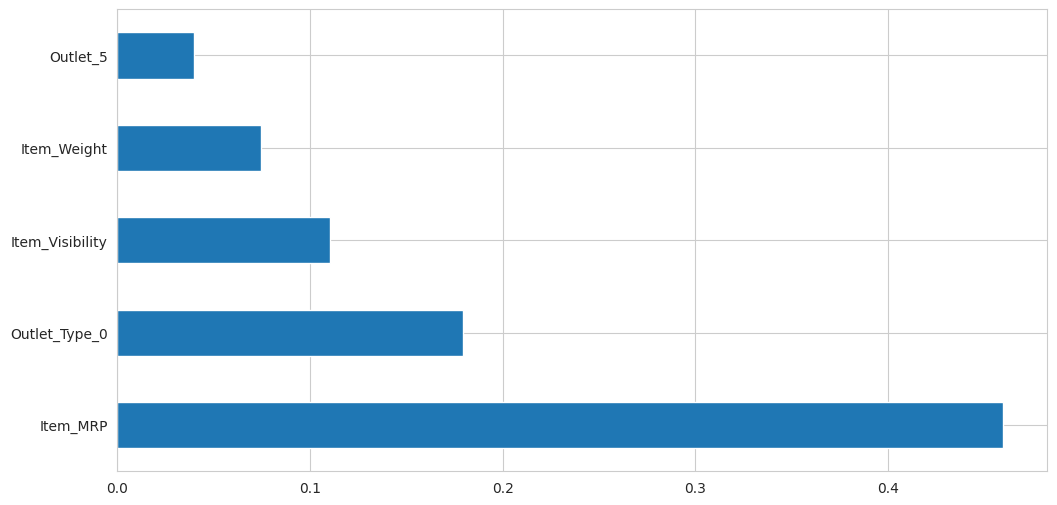

In [ ]:
# visualizing feature importances
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

### 2 Machine Learning Algorithms

***Task***: As predicting the Big mart sales is a regression problem, this project will guide you on applying regression machine learning algorithms. You will learn about linear regression, the Bayesian model, ensemble bagging model like the random forest, boosting models. Additionally, the project will teach you about hyperparameter tuning for all the models that one can use to prepare the Bigmart sales prediction project report. This project is one of the excellent ML Projects for beginners to explore how machine learning and data science tools assist in solving large-scale business problems.

After completing Data Preprocessing and Feature Transformation, the dataset is now ready to build a predictive
model. The algorithm is fed into the training set in order to learn how to forecast values. After Model Building a
target variable to forecast, testing data is supplied as input. The predictive models are built using
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest
- Decision Tree
- AdaBoost
- XGBoost
- KNeighbors
- lightgbm
- support vector machine
- MLPRegressor

In [ ]:
#Importing Machine Learning Model
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.svm import LinearSVC  # SVC stands for support vector classifier
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR     # Support Vector Machine
from lightgbm import LGBMRegressor
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#statistical Tools
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 28)
(1705, 28)
(6818,)
(1705,)


In [ ]:
###  Linear regression
lr = LinearRegression()

### random forest
rf = ensemble.RandomForestRegressor(n_estimators=400, bootstrap=True, min_samples_leaf=100, min_samples_split=8, max_depth=6)

#  Lasso Regression
mod = lm.Lasso(alpha=.1)

# Ridge Regression,
rig = lm.RidgeCV(cv=3)

# adabooster regressor
ada = ensemble.AdaBoostRegressor(n_estimators=1000, learning_rate=0.01)

# gradient boosting regressor
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5,
                                         min_samples_split=8, min_samples_leaf=100)

# XGBRF regressor
xgb = XGBRFRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)

# Catbooster regresssion
cat = CatBoostRegressor(verbose=0)

#  decision tree regressor
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# LGBM regressor
lgbr = LGBMRegressor(n_estimators = 440, learning_rate=0.01, max_depth=12, objective='tweedie', num_leaves=15, num_threads = 4)

# k.nearest neighbour
knn = KNeighborsRegressor()

# multiple layer perceptron
mlp = MLPRegressor()

# support vector machine
svr = SVR(kernel='linear', C=10, gamma='scale')

In [ ]:
accuracy = {}
rmse = {}
explained_variance = {}
max_error = {}
MAE = {}

def train_model(model, model_name):
    print(model_name)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc = metrics.r2_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('R2_Score',acc)    # R2_score is the same as the accuracy of the model

    met = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE : ', met)              #
    rmse[model_name] = met

    var = (metrics.explained_variance_score(y_test, pred))
    print('Explained_Variance : ', var)
    explained_variance[model_name] = var

    error = (metrics.max_error(y_test, pred))
    print('Max_Error : ', error)
    max_error[model_name] = error

    err = metrics.mean_absolute_error(y_test, pred)
    print("Mean Absolute Error", err)
    MAE[model_name] = err

In [ ]:
# result from linear regression
train_model(lr, 'Linear Regression')

Linear Regression
R2_Score 56.41600877322126
RMSE :  1129.443299660332
Explained_Variance :  0.5643376733553034
Max_Error :  6781.884463727622
Mean Absolute Error 851.6155798741671


In [ ]:
train_model(rf, 'random forest')

random forest
R2_Score 58.98582866853512
RMSE :  1095.640064355335
Explained_Variance :  0.5898662629343121
Max_Error :  6423.172289517036
Mean Absolute Error 776.7624896440367


In [ ]:
train_model(mod, 'Lasso Regression')

Lasso Regression
R2_Score 56.41955923833404
RMSE :  1129.3972950312238
Explained_Variance :  0.5643726371358803
Max_Error :  6785.004309920139
Mean Absolute Error 851.4874179722761


In [ ]:
train_model(rig, 'Ridge')

Ridge
R2_Score 56.41633924208911
RMSE :  1129.4390177377093
Explained_Variance :  0.5643410663557712
Max_Error :  6783.870971797973
Mean Absolute Error 851.5708853197325


In [ ]:
train_model(rig, 'Ridge')

Ridge
R2_Score 56.41633924208911
RMSE :  1129.4390177377093
Explained_Variance :  0.5643410663557712
Max_Error :  6783.870971797973
Mean Absolute Error 851.5708853197325


In [ ]:
train_model(ada, 'AdaBoost Regressor')

AdaBoost Regressor
R2_Score 55.954883008365364
RMSE :  1135.4024265368655
Explained_Variance :  0.5748708498398527
Max_Error :  5947.471205578937
Mean Absolute Error 852.9423431006833


In [ ]:
train_model(gbr, 'Gradient Boosting Regressor')

Gradient Boosting Regressor
R2_Score 58.75171288944535
RMSE :  1098.7626633770599
Explained_Variance :  0.5875422772892998
Max_Error :  6310.270028383183
Mean Absolute Error 777.0102817986416


In [ ]:
train_model(xgb, 'XGBRFRegressor')

XGBRFRegressor
R2_Score 59.21447107147104
RMSE :  1092.5818545248787
Explained_Variance :  0.5921760981620947
Max_Error :  6057.9628320312495
Mean Absolute Error 774.2041493484954


In [ ]:
train_model(cat, 'CatBoost Regressor')

CatBoost Regressor
R2_Score 56.173599703793265
RMSE :  1132.5798602794962
Explained_Variance :  0.561759389239882
Max_Error :  7077.943580681433
Mean Absolute Error 808.6134475032046


In [ ]:
train_model(dtr, 'Decision TreeRegressor')

Decision TreeRegressor
R2_Score 58.31005469720252
RMSE :  1104.6293971194
Explained_Variance :  0.5831106558095991
Max_Error :  6152.243245283023
Mean Absolute Error 780.0744057367947


In [ ]:
train_model(lgbr, 'LGBMRegressor')

LGBMRegressor
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
R2_Score 59.551856451454064
RMSE :  1088.053451329702
Explained_Variance :  0.595519941420384
Max_Error :  6252.844120233353
Mean Absolute Error 769.917800644959


In [ ]:
train_model(knn, 'KNeighborsRegressor')

KNeighborsRegressor
R2_Score 41.06948932665511
RMSE :  1313.3214466580387
Explained_Variance :  0.41382253227225096
Max_Error :  5457.695759999999
Mean Absolute Error 951.6723396832845


In [ ]:
train_model(mlp, 'MLPRegressor')

MLPRegressor
R2_Score 56.104882866229076
RMSE :  1133.467416896783
Explained_Variance :  0.5611402309305715
Max_Error :  6957.00676059286
Mean Absolute Error 850.5511034805127


In [ ]:
train_model(svr, ' support vector machine')

 support vector machine
R2_Score 54.85853241251729
RMSE :  1149.4465238699413
Explained_Variance :  0.5533239041014177
Max_Error :  7381.106411347653
Mean Absolute Error 845.3463719695279


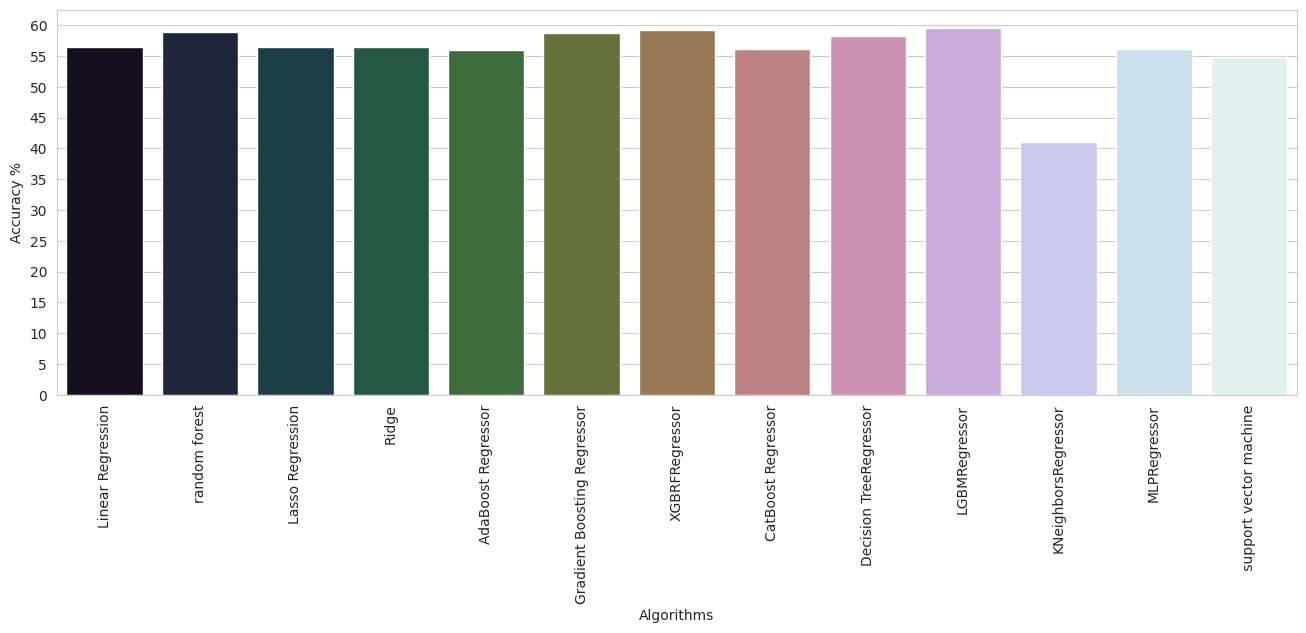

In [ ]:
# visualizing the output

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

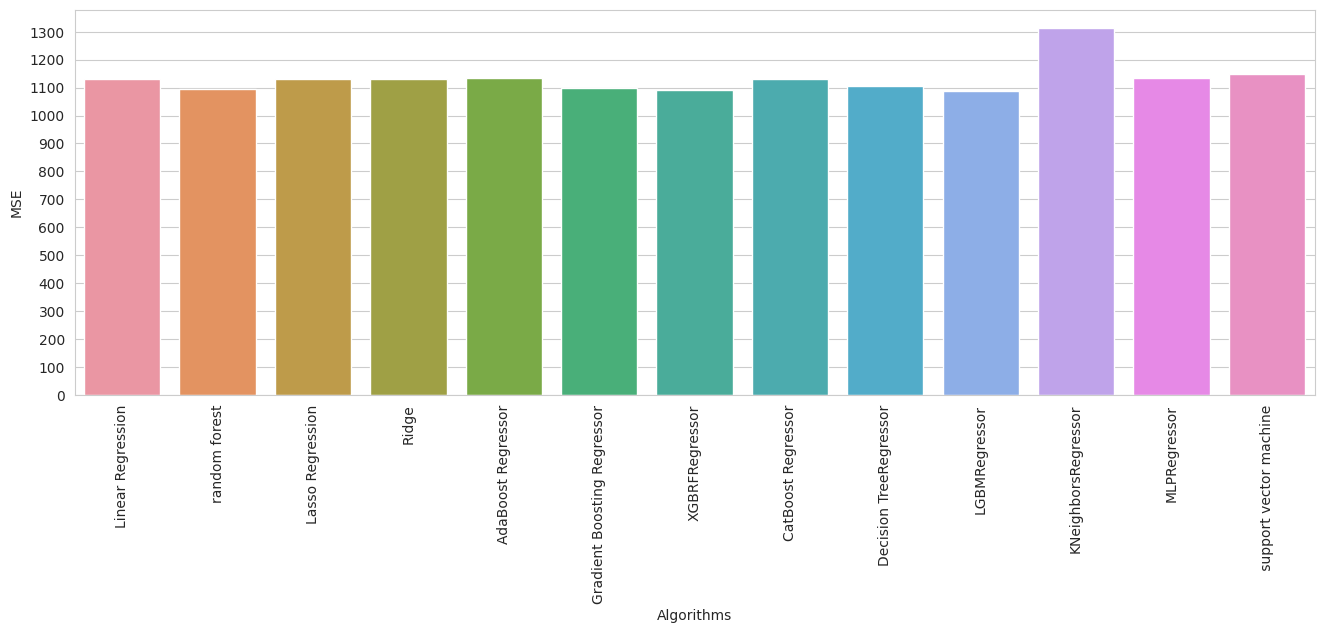

In [ ]:
# visualizing RMSE
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1600,100))
plt.ylabel("MSE")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(rmse.keys()), y=list(rmse.values()))
plt.show()

Observation:
- from the machine learning models above, we can se that lightgbm the highest value of accuracy or r2 value with smallest RMSE followed by gradient booster regressor and XGBM regressor.

side_notes:
- ***MAE***:  MAE of your model is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error. sum all the errors and divide them by a total number of observations And this is MAE.  
- ***MSE***: It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.
- ***RMSE***: As RMSE is clear by the name itself, that it is a simple square root of mean squared error. Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE.
- ***r2***: R2 score is a metric that tells the performance of your model. R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.Regression line moves towards perfection, R2 score move towards one. and the model performance improves.

In [ ]:
### Model Tuning

In [ ]:
# to find the names and current values for all parameters for a given estimator, use:
print(lgbr.get_params(), end=' ')

'''
These are the parameters that need to be tuned. According to the documentation of lightgbm, the most important parameters are:
- learning_rate: [0, 1]
- number of leaves: num_leaves = 2^(max_depth)
- max_depth
- boosting: gbdt, rf, dart, goss
min_data_in_leaf:>=0
'''

# LGBMRegressor

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': 12, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 440, 'n_jobs': -1, 'num_leaves': 15, 'objective': 'tweedie', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'num_threads': 4} 

'\nThese are the parameters that need to be tuned. According to the documentation of lightgbm, the most important parameters are:\n- learning_rate: [0, 1]\n- number of leaves: num_leaves = 2^(max_depth)\n- max_depth\n- boosting: gbdt, rf, dart, goss\nmin_data_in_leaf:>=0\n'

In [ ]:
# Create lightgbm
lgb_class = LGBMRegressor()

#Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.0001, 0.5, num=30),
              'num_leaves': [70, 80, 90, 100], 'max_depth': [7, 8, 9, 10]}

In [ ]:
# fit and predict from grid search
#grid_lgb_class.fit(x_train, y_train)
#grid_lgb_class.predict(x_test)

It's because accuracy_score is for classification tasks only. For regression you should use something different, for example:

clf.score(x_test, y_test)

In [ ]:
# Tuning lightgbm parameters

def gbm_grid_search(learn_rate, max_depth, num_leaves):

    # Extend the model creation section
    model = LGBMRegressor(learning_rate=learn_rate, max_depth=max_depth, num_leaves=num_leaves)

    predictions = model.fit(x_train, y_train).predict(x_test)

    # Extend the return part
    return([learn_rate, max_depth, num_leaves, r2_score(y_test, predictions)])

In [ ]:
# Set the learning rates & results storage
#learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
learning_rate_list = np.linspace(0.0001, 0.5, num=30)
max_depth_list =  [7, 8, 9, 10]
num_leaves_list = [70, 80, 90, 100]
results_list = []



for learn_rate in learning_rate_list:
    for max_depth in max_depth_list:

        # Extend the for loop
        for num_leaves in num_leaves_list:

            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search(learn_rate, max_depth, num_leaves))

In [ ]:
# Gather everything into a DataFrame

results_df = pd.DataFrame(results_list, columns=['learning_rate','max_depth','num_leaves', 'accuracy']).sort_values(["accuracy"],ascending=False).head()
print(results_df)

    learning_rate  max_depth  num_leaves  accuracy
32       0.034576          7          70  0.588567
33       0.034576          7          80  0.588118
35       0.034576          7         100  0.587771
34       0.034576          7          90  0.587771
49       0.051814          7          80  0.585407


We can see that the best accuracy occured at learning_rate of ```0.034576```, max_depth ```7``` and num_leaves ```80```

In [ ]:
# LGBM regressor tuned
lgbr_tuned = LGBMRegressor(learning_rate=0.034576, max_depth=7, num_leaves=80)

In [ ]:
lgbr_tuned.fit(x_train, y_train)
lgbr_tuned.predict(x_test)

array([2597.66352207, 1778.83549001, 2343.21470394, ..., 4425.96721416,
        242.52485238, 5973.54685947])

### 3. Testing Phase

In [ ]:
Prediction_LR = pd.DataFrame(test['Item_Identifier'])
Prediction_LR['Outlet_Identifier'] = test['Outlet_Identifier']

In [ ]:
test = test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [ ]:
test.shape

(5681, 28)

In [ ]:
item_sales_lgbr = lgbr_tuned.predict(test)

Prediction_LR['Item_Outlet_Sales'] = item_sales_lgbr
Prediction_LR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1635.184290
1,FDW14,OUT017,1386.503159
2,NCN55,OUT010,658.259570
3,FDQ58,OUT017,2226.536396
4,FDY38,OUT027,6088.302952


In [ ]:
# Converting submission file to .csv format
Prediction_LR.to_csv('lightgbm.csv', index=False)

### reference

https://www.kaggle.com/code/nimishsawant/big-mart-sales-prediction

https://www.kaggle.com/code/saurabhmittal1996/big-mart-sales-prediction